# Main Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
cb_10x = os.path.join("..", "..", "se", "clean-files-dl", "aggr", "agg-cb-10.csv")
cf_10x = os.path.join("..", "..", "se", "clean-files-dl", "aggr", "agg-cf-10.csv")
cb_5x = os.path.join("..", "..", "se", "clean-files-dl", "aggr", "agg-cb-5.csv")
cf_5x = os.path.join("..", "..", "se", "clean-files-dl", "aggr", "agg-cf-5.csv")
cb_1x = os.path.join("..", "..", "se", "clean-files-dl", "aggr", "agg-cb-1.csv")
cf_1x = os.path.join("..", "..", "se", "clean-files-dl", "aggr", "agg-cf-1.csv")

# Calculations for every file

#### 1x Scenarios

In [14]:
# Read content of the file
df_cb_1 = pd.read_csv(cb_1x)
df_cf_1 = pd.read_csv(cf_1x)

#### 5x Scenarios

In [ ]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (bits/s/Hz)"] = df_ue["Mean_SE"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_5 = read_data_by_ue(cb_5x)
dfs_cf_5 = read_data_by_ue(cf_5x)

#### 10x Scenarios

In [ ]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (bits/s/Hz)"] = df_ue["Mean_SE"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_10 = read_data_by_ue(cb_10x)
dfs_cf_10 = read_data_by_ue(cf_10x)

# Behavior Graphics 

## 1X Scenarios

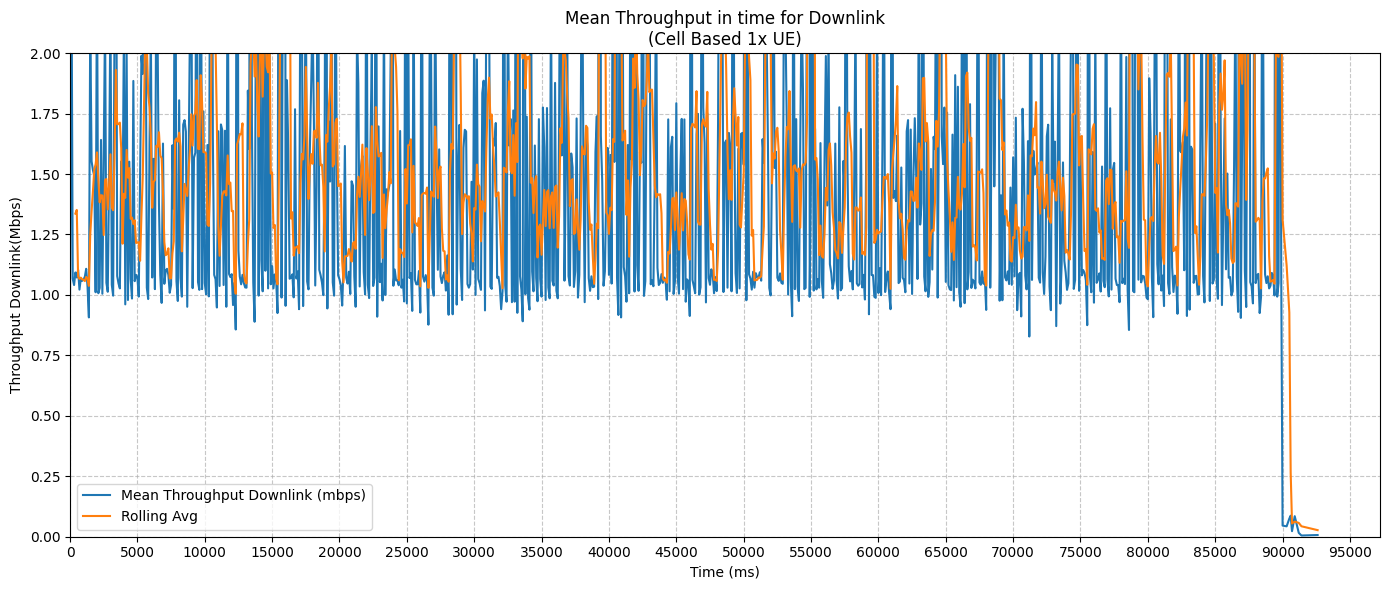

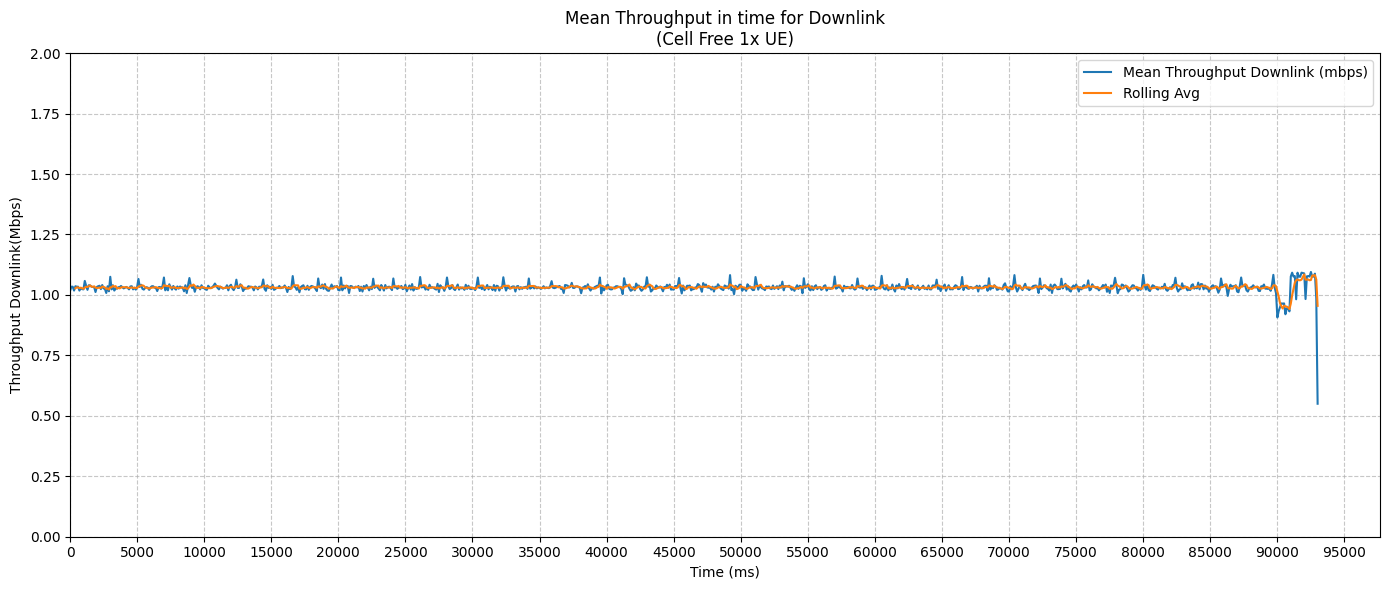

In [ ]:
# Round of SE values to 3 decimal places
df_cb_1["Mean_SE"] = df_cb_1["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_1["Rolling Avg (bits/s/Hz)"] = df_cb_1["Mean_SE"].rolling(window=5).mean()

# Graphic of SEling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_SE", data=df_cb_1, label="Mean SE Downlink (bits/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_1, label="Rolling Avg")
plt.title("Mean SE in time for Downlink\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Downlink(bits/s/Hz)")
plt.legend()
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Round of SE values to 3 decimal places
df_cf_1["Mean_SE"] = df_cf_1["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_1["Rolling Avg (bits/s/Hz)"] = df_cf_1["Mean_SE"].rolling(window=5).mean()

# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_SE", data=df_cf_1, label="Mean SE Downlink (bits/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_1, label="Rolling Avg")
plt.title("Mean SE in time for Downlink\n(Cell Free 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Downlink(bits/s/Hz)")
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(df_cb_1["Mean_SE"].describe())
print(df_cf_1["Mean_SE"].describe())

count    909.000000
mean       1.555864
std        1.097410
min        0.005000
25%        1.031000
50%        1.089000
75%        1.704000
max       17.623000
Name: Mean_Throughput, dtype: float64
count    930.000000
mean       1.030847
std        0.022997
min        0.550000
25%        1.024000
50%        1.031000
75%        1.037000
max        1.095000
Name: Mean_Throughput, dtype: float64


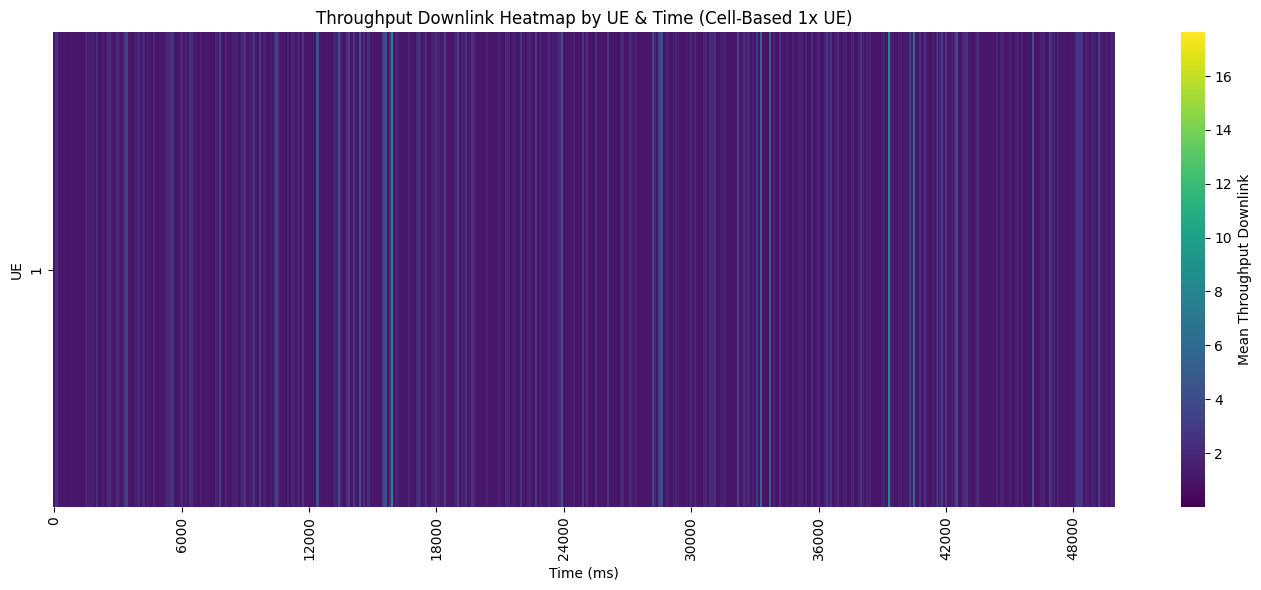

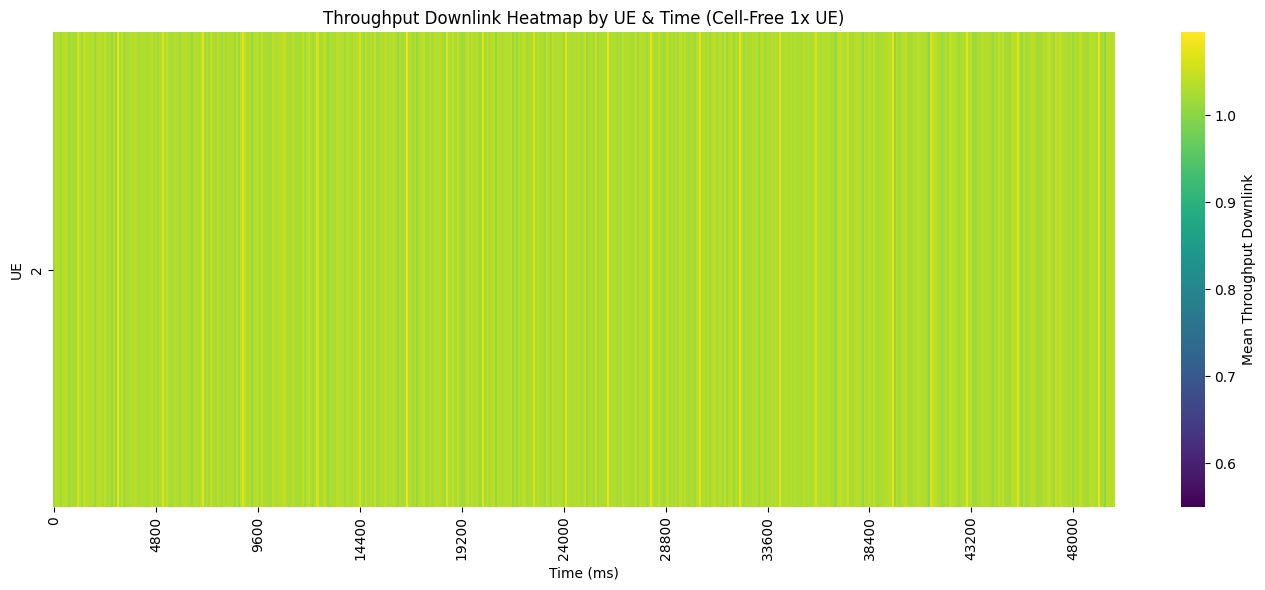

In [ ]:
heat_cb = df_cb_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf = df_cf_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'})
plt.title("SE Downlink Heatmap by UE & Time (Cell-Based 1x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'})
plt.title("SE Downlink Heatmap by UE & Time (Cell-Free 1x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

## 5X Scenarios

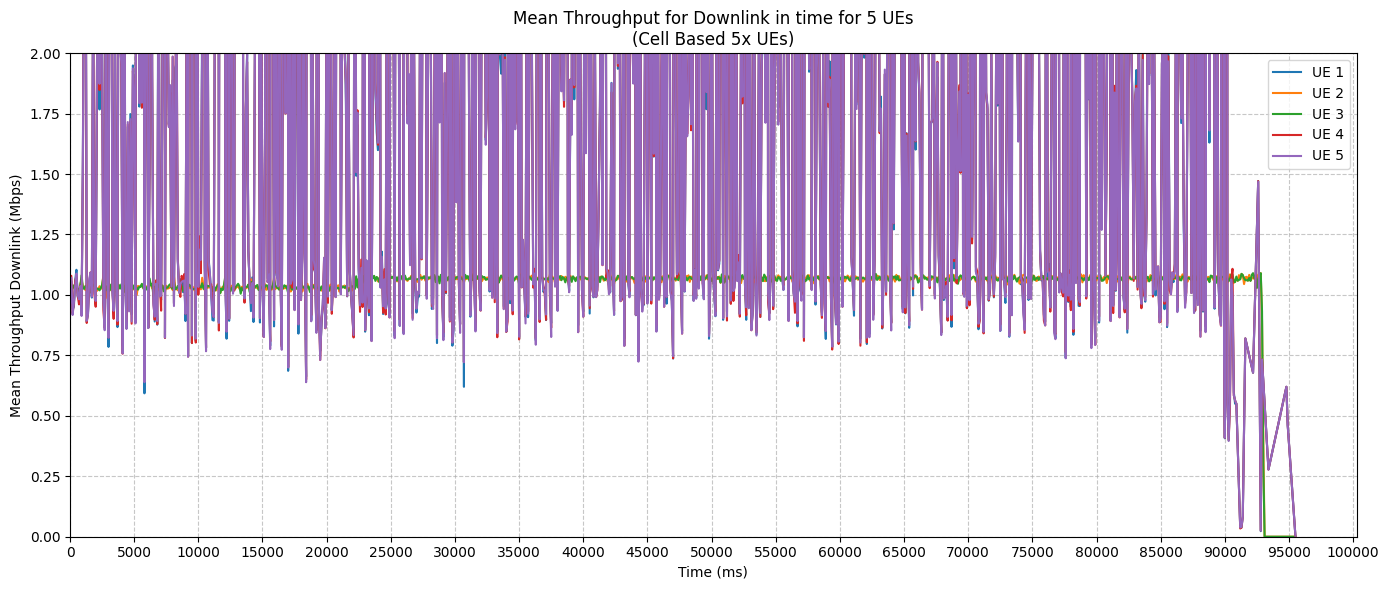

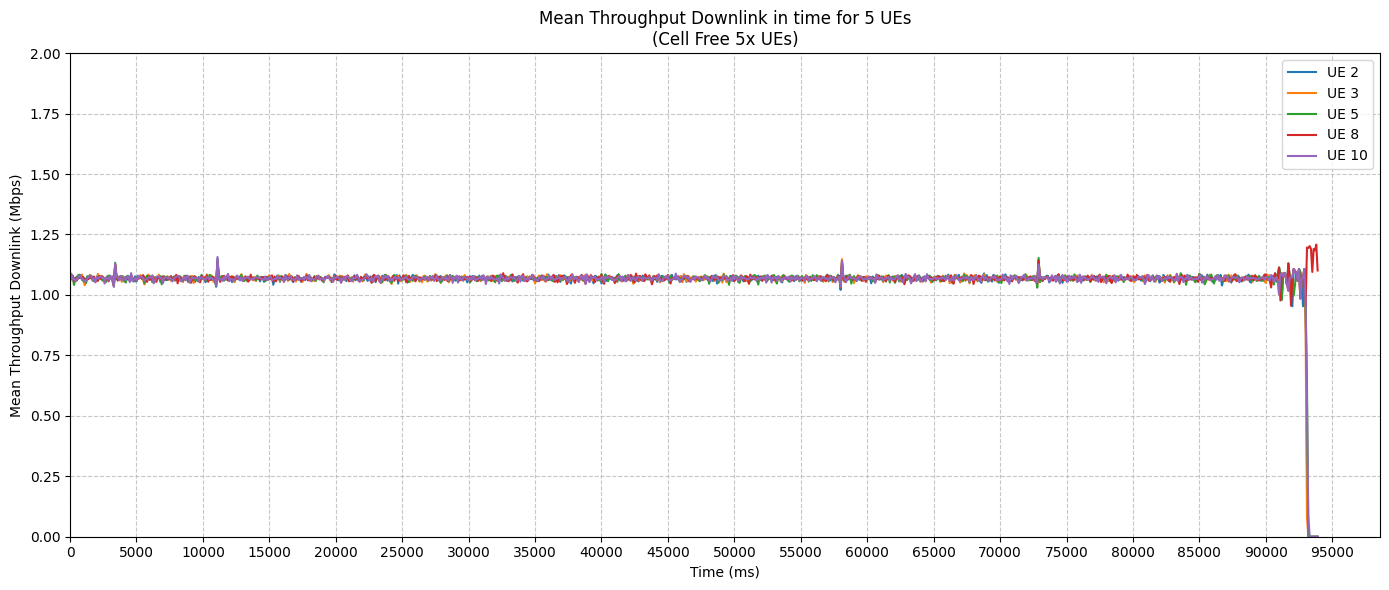

In [ ]:
plt.figure(figsize=(14, 6))

# Graphic of SE and Rolling Average
for ue, df in dfs_cb_5.items():
    dfs_cb_5[ue]["Mean_SE"] = dfs_cb_5[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")

plt.title("Mean SE for Downlink in time for 5 UEs\n(Cell Based 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean SE Downlink (bits/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

# Graphic of SE and Rolling Average
for ue, df in dfs_cf_5.items():
    dfs_cf_5[ue]["Mean_SE"] = dfs_cf_5[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")

plt.title("Mean SE Downlink in time for 5 UEs\n(Cell Free 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean SE Downlink (bits/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
df_cb_5 = pd.read_csv(cb_5x)
df_cf_5 = pd.read_csv(cf_5x)

print(df_cb_5["Mean_SE"].describe())
print(df_cf_5["Mean_SE"].describe())

count    4678.000000
mean        1.833157
std         1.969325
min         0.000000
25%         1.030874
50%         1.070107
75%         1.924035
max        26.146125
Name: Mean_Throughput, dtype: float64
count    4695.000000
mean        1.060770
std         0.091021
min         0.000000
25%         1.063095
50%         1.068862
75%         1.074091
max         1.207510
Name: Mean_Throughput, dtype: float64


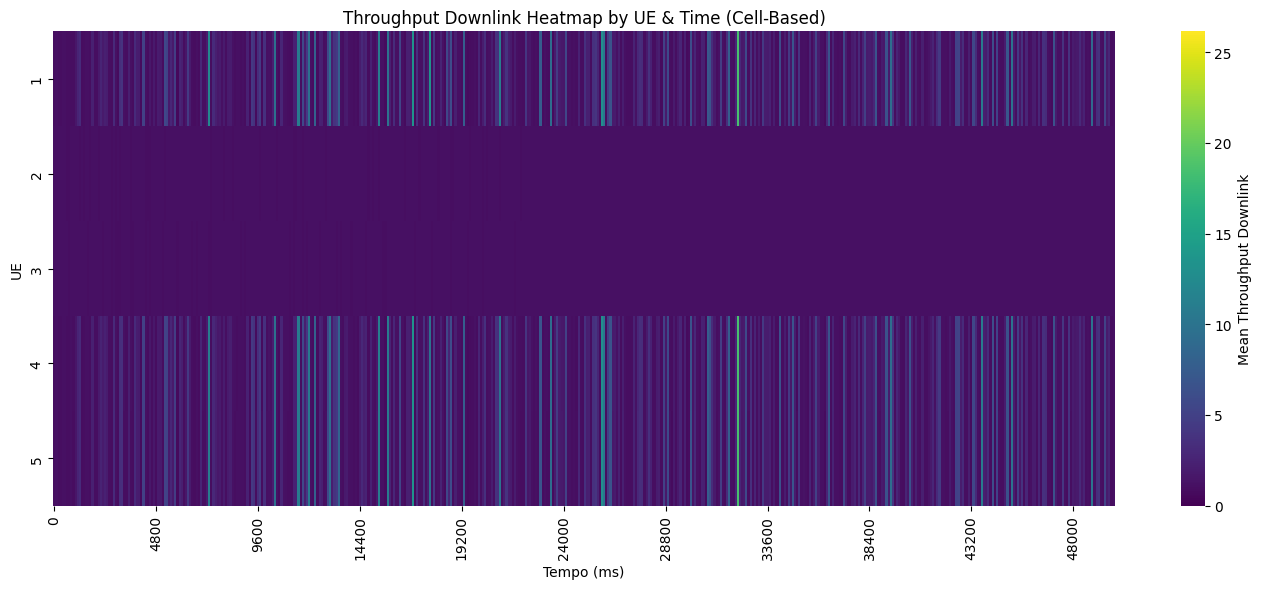

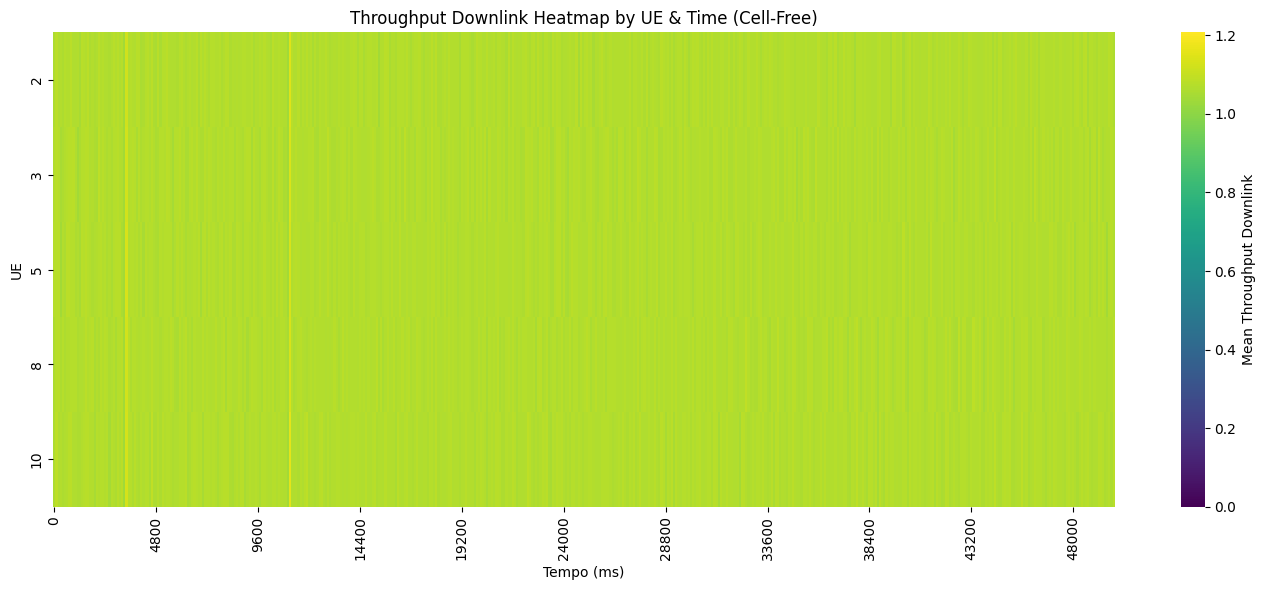

In [ ]:
heat_cb = df_cb_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf = df_cf_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'})
plt.title("SE Downlink Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'})
plt.title("SE Downlink Heatmap by UE & Time (Cell-Free)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

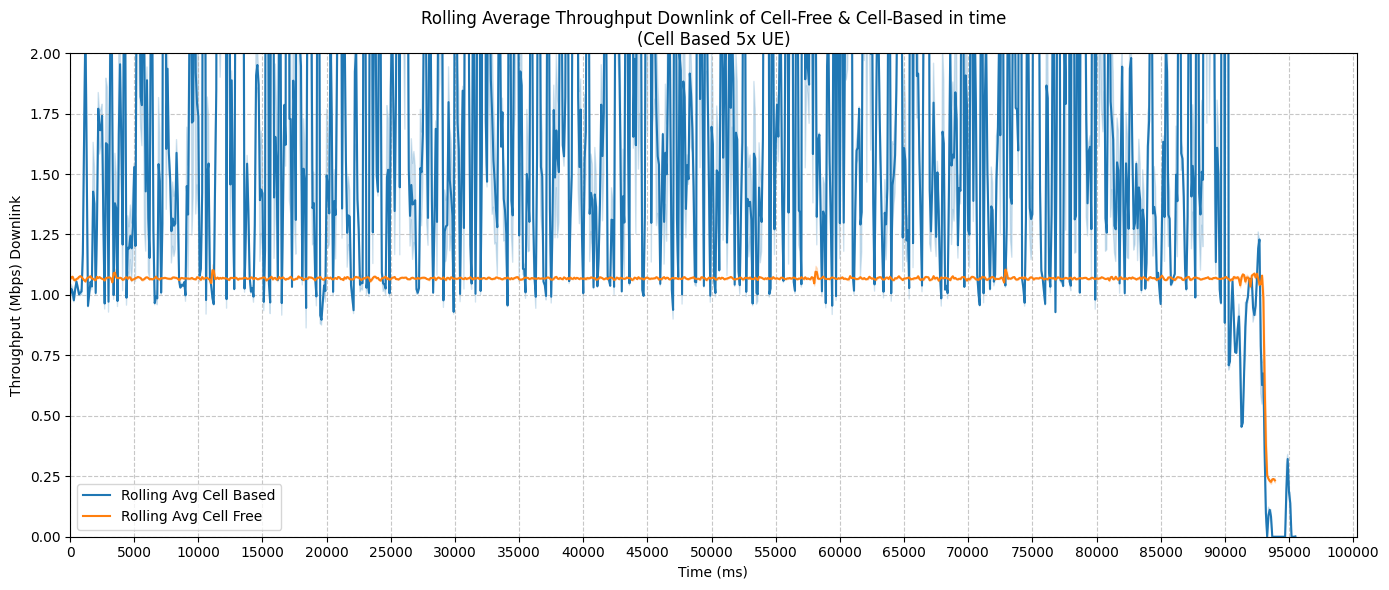

In [ ]:
# Round of SE values to 3 decimal places
df_cb_5["Mean_SE"] = df_cb_5["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_5["Rolling Avg (bits/s/Hz)"] = df_cb_5["Mean_SE"].rolling(window=5).mean()

# Round of SE values to 3 decimal places
df_cf_5["Mean_SE"] = df_cf_5["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_5["Rolling Avg (bits/s/Hz)"] = df_cf_5["Mean_SE"].rolling(window=5).mean()

# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5, label="Rolling Avg Cell Free")
plt.title("Rolling Average SE Downlink of Cell-Free & Cell-Based in time\n(Cell Based 5x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE (bits/s/Hz) Downlink")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10X Scenarios

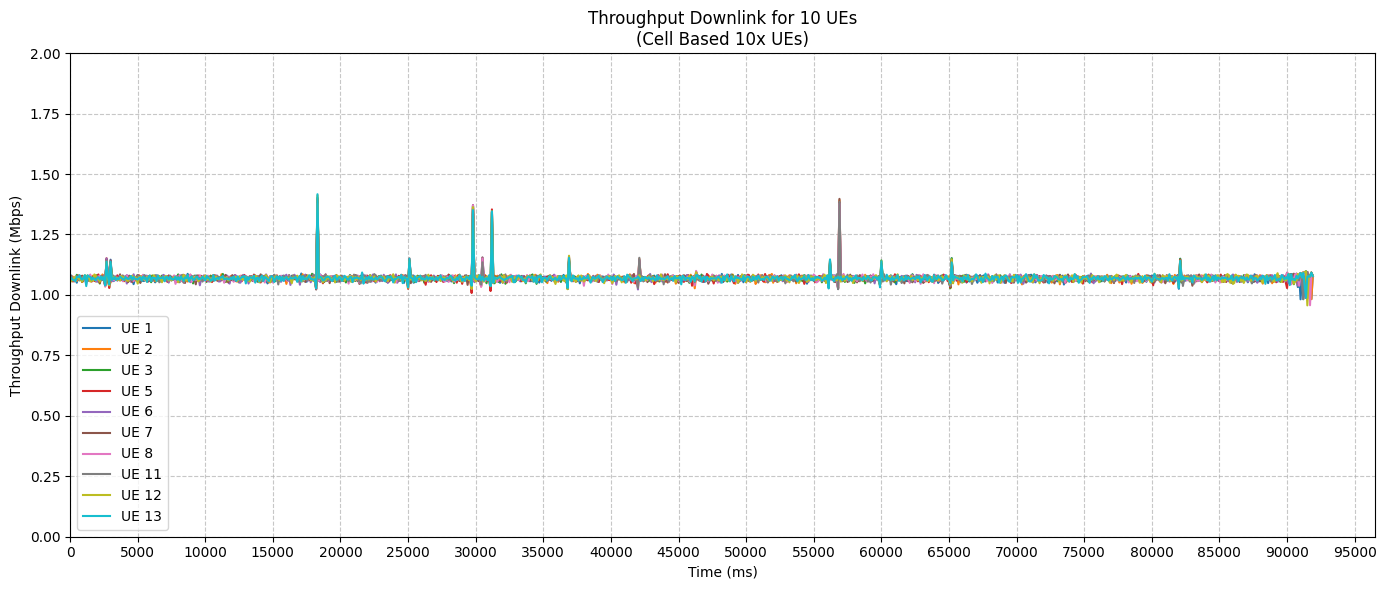

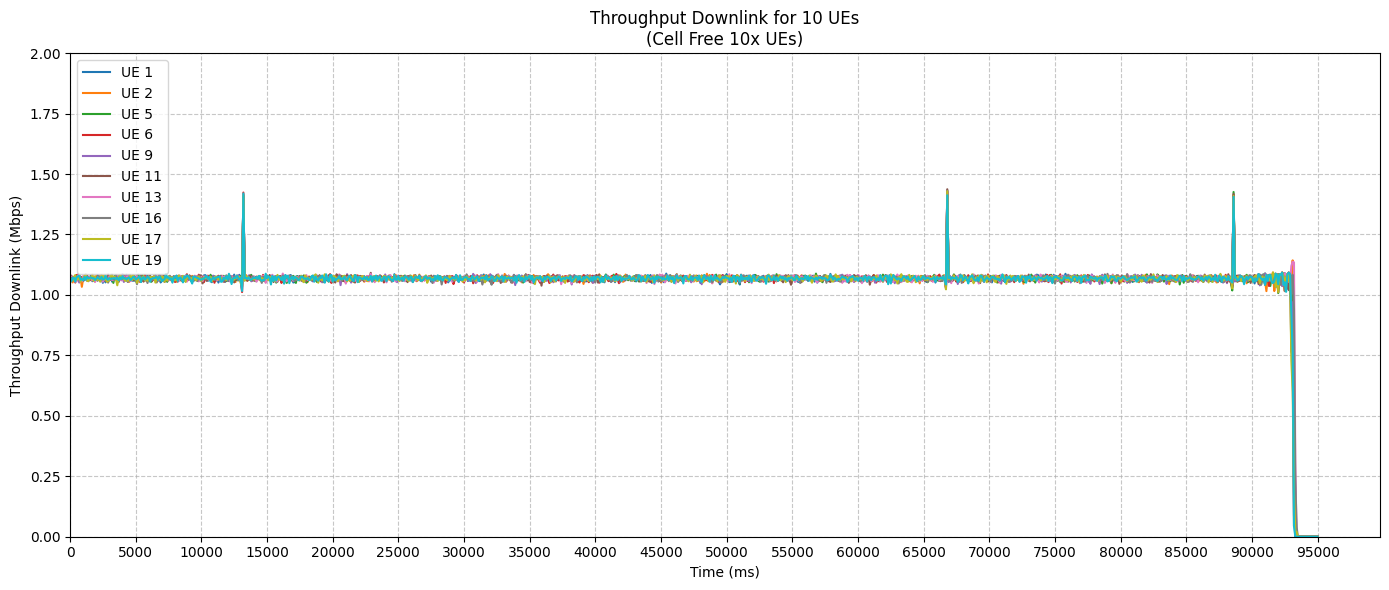

In [ ]:
# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb_10.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")
plt.title("SE Downlink for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Downlink (bits/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf_10.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")
plt.title("SE Downlink for 10 UEs\n(Cell Free 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Downlink (bits/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_cb_10 = pd.read_csv(cb_10x)
df_cf_10 = pd.read_csv(cf_10x)

print(df_cb_10["Mean_SE"].describe())
print(df_cf_10["Mean_SE"].describe())

count    9190.000000
mean        1.069624
std         0.020694
min         0.956690
25%         1.063490
50%         1.068959
75%         1.074178
max         1.416601
Name: Mean_Throughput, dtype: float64
count    9500.000000
mean        1.049481
std         0.144697
min         0.000000
25%         1.062920
50%         1.068809
75%         1.073936
max         1.437136
Name: Mean_Throughput, dtype: float64


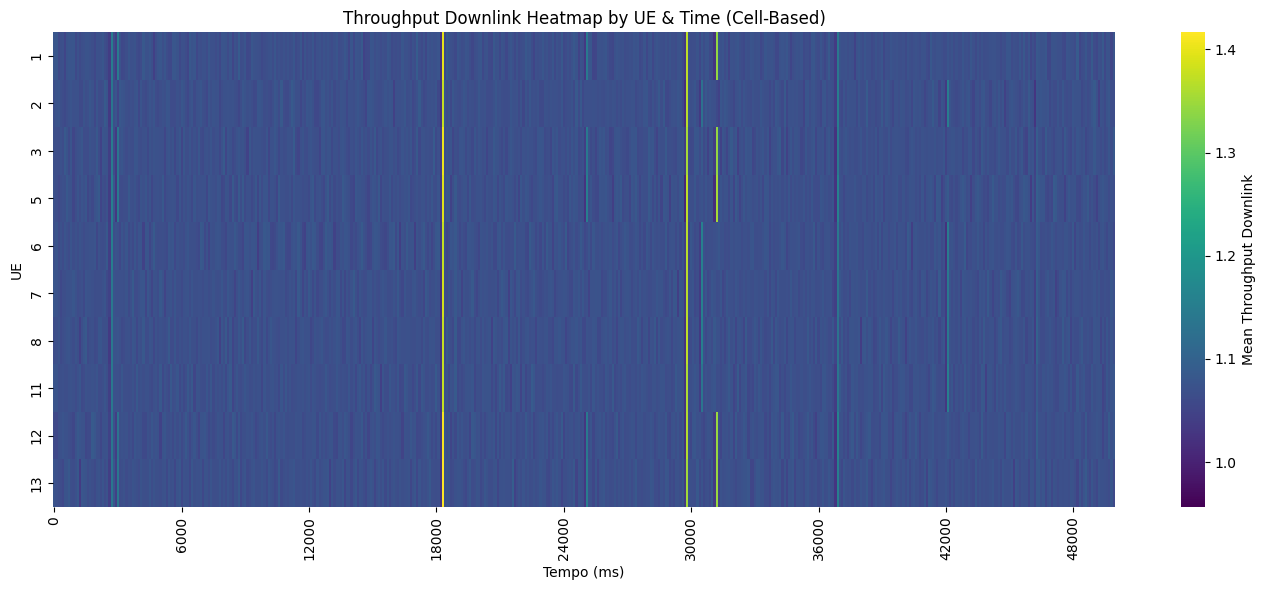

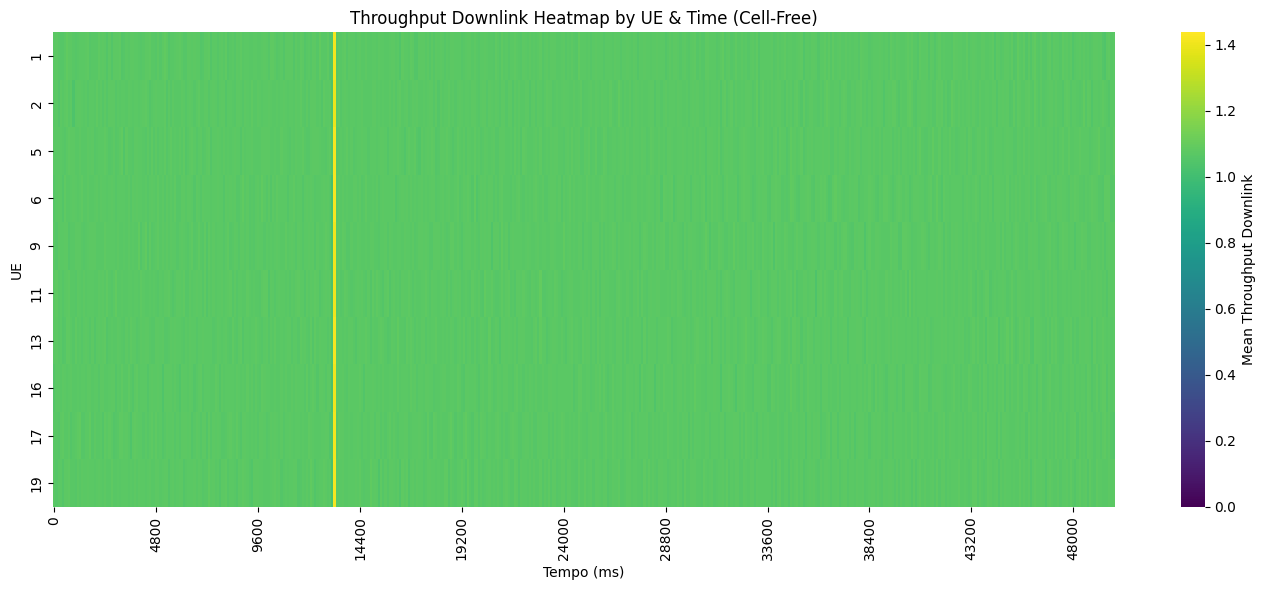

In [ ]:

heat_cb = df_cb_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf = df_cf_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz) '})
plt.title("SE Downlink Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz) '})
plt.title("SE Downlink Heatmap by UE & Time (Cell-Free)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

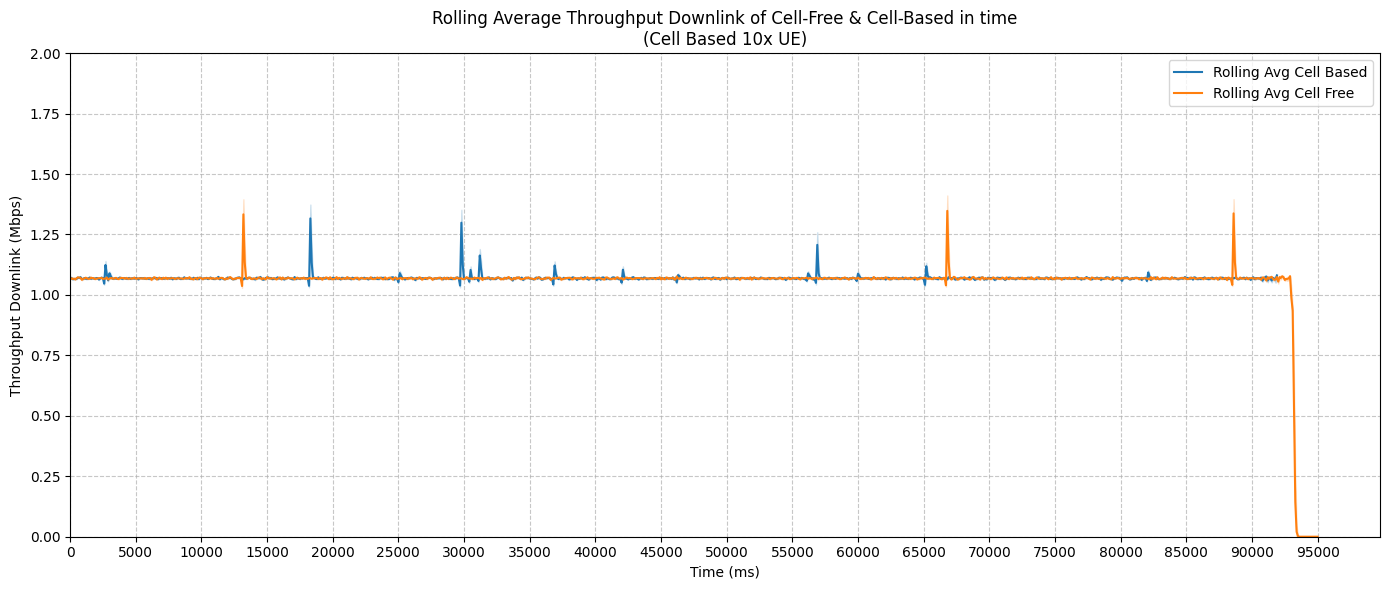

In [ ]:
# Round of SE values to 3 decimal places
df_cb_10["Mean_SE"] = df_cb_10["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_10["Rolling Avg (bits/s/Hz)"] = df_cb_10["Mean_SE"].rolling(window=5).mean()

# Round of SE values to 3 decimal places
df_cf_10["Mean_SE"] = df_cf_10["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_10["Rolling Avg (bits/s/Hz)"] = df_cf_10["Mean_SE"].rolling(window=5).mean()

# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10, label="Rolling Avg Cell Free")
plt.title("Rolling Average SE Downlink of Cell-Free & Cell-Based in time\n(Cell Based 10x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Downlink (bits/s/Hz)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# All Datasets

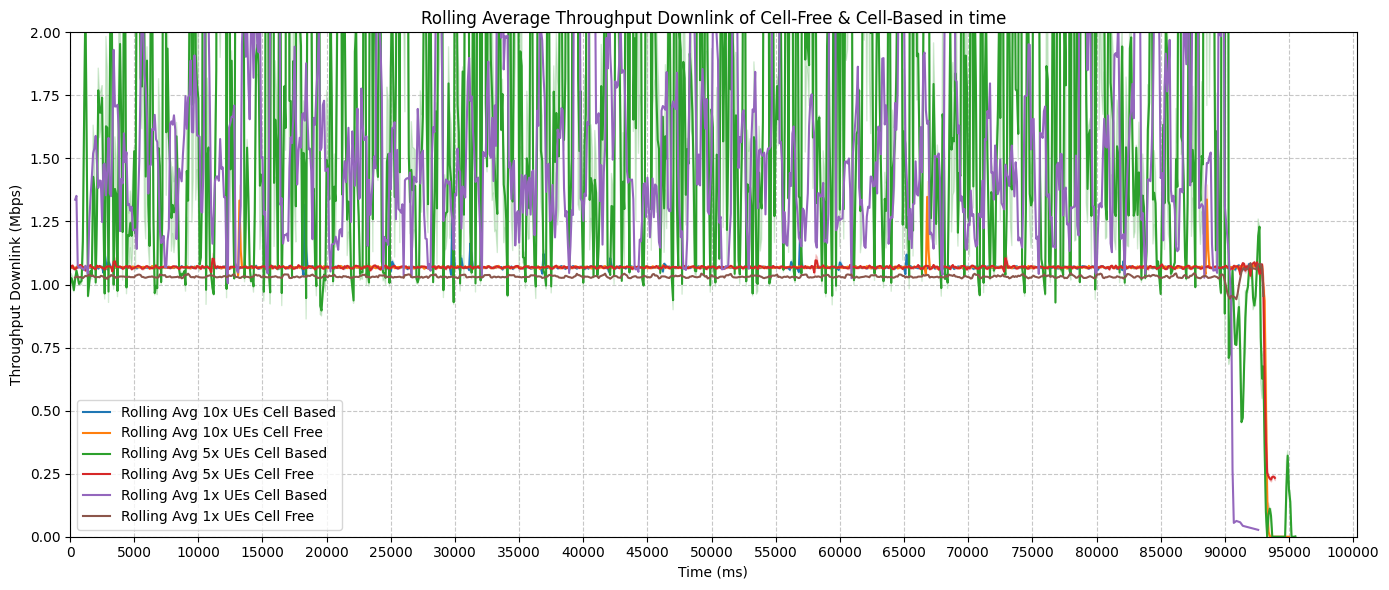

In [ ]:
# Round of SE values to 3 decimal places
df_cb_1["Mean_SE"] = df_cb_1["Mean_SE"].round(3)
df_cb_1["Rolling Avg (bits/s/Hz)"] = df_cb_1["Mean_SE"].rolling(window=5).mean()
df_cf_1["Mean_SE"] = df_cf_1["Mean_SE"].round(3)
df_cf_1["Rolling Avg (bits/s/Hz)"] = df_cf_1["Mean_SE"].rolling(window=5).mean()

# Round of SE values to 3 decimal places
df_cb_5["Mean_SE"] = df_cb_5["Mean_SE"].round(3)
df_cb_5["Rolling Avg (bits/s/Hz)"] = df_cb_5["Mean_SE"].rolling(window=5).mean()
df_cf_5["Mean_SE"] = df_cf_5["Mean_SE"].round(3)
df_cf_5["Rolling Avg (bits/s/Hz)"] = df_cf_5["Mean_SE"].rolling(window=5).mean()

# Round of SE values to 3 decimal places
df_cb_10["Mean_SE"] = df_cb_10["Mean_SE"].round(3)
df_cb_10["Rolling Avg (bits/s/Hz)"] = df_cb_10["Mean_SE"].rolling(window=5).mean()
df_cf_10["Mean_SE"] = df_cf_10["Mean_SE"].round(3)
df_cf_10["Rolling Avg (bits/s/Hz)"] = df_cf_10["Mean_SE"].rolling(window=5).mean()

# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10, label="Rolling Avg 10x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10, label="Rolling Avg 10x UEs Cell Free")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5, label="Rolling Avg 5x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5, label="Rolling Avg 5x UEs Cell Free")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_1, label="Rolling Avg 1x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_1, label="Rolling Avg 1x UEs Cell Free")
plt.title("Rolling Average SE Downlink of Cell-Free & Cell-Based in time")
plt.xlabel("Time (ms)")
plt.ylabel("SE Downlink (bits/s/Hz)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Stats

## Mean SE Downlink (bits/s/Hz)

| Métrica      | CB (1x UEs) | CF (1x UEs) | CB (5x UEs) | CF (5x UEs) | CB (10x UEs) | CF (10x UEs) |
|--------------|-----------|-----------|-------------|-------------|--------------|--------------|
| Count        | 909        | 930        | 4678        | 4695        | 9190         | 9500         |
| Mean         | 1.556      | 1.031      | 1.833       | 1.061       | 1.070        | 1.049        |
| Std          | 1.097      | 0.023      | 1.969       | 0.091       | 0.021        | 0.145        |
| Min          | 0.005      | 0.550      | 0.000       | 0.000       | 0.957        | 0.000        |
| 25%          | 1.031      | 1.024      | 1.031       | 1.063       | 1.063        | 1.063        |
| 50% (Median) | 1.089      | 1.031      | 1.070       | 1.069       | 1.069        | 1.069        |
| 75%          | 1.704      | 1.037      | 1.924       | 1.074       | 1.074        | 1.074        |
| Max          | 17.623     | 1.095      | 26.146      | 1.208       | 1.417        | 1.437        |


## Requirements

|                | VM RAN    | VM CN     | VM UEs      |  VM FlexRIC | 
|--------------  |-----------|-----------|-------------|-------------|
| CPU            | 12        | 2         | 14          | 4           | 
| RAM (GiB)      | 24        | 2         | 20          | 6           | 
| Storage  (GiB) | 76        | 25        | 50          | 50          | 
